In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
cond = penguins['bill_length_mm'].isnull()
penguins2 = penguins[~cond]
penguins2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
penguins2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [ ]:
penguins2['sex'].mode() # MALE

0    MALE
Name: sex, dtype: object

In [ ]:
penguins2['sex'] = penguins2['sex'].fillna('MALE')

<ipython-input-7-c02295bd72c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins2['sex'] = penguins2['sex'].fillna('MALE')


In [ ]:
penguins2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [ ]:
x = penguins2.drop(columns=['body_mass_g'])  # 'island' 컬럼을 제외한 데이터를 x에 할당
y = penguins2['body_mass_g']  # 'island' 컬럼만을 y에 할당

In [ ]:
x_encoded = pd.get_dummies(x)
# StandardScaler 적용
scaler_standard = StandardScaler()
x_scaled_standard = scaler_standard.fit_transform(x_encoded)
print("StandardScaler 적용 결과:\n", x_scaled_standard)

# MinMaxScaler 적용
scaler_minmax = MinMaxScaler()
x_scaled_minmax = scaler_minmax.fit_transform(x_encoded)
print("\nMinMaxScaler 적용 결과:\n", x_scaled_minmax)

# RobustScaler 적용
scaler_robust = RobustScaler()
x_scaled_robust = scaler_robust.fit_transform(x_encoded)
print("\nRobustScaler 적용 결과:\n", x_scaled_robust)

# Normalizer 적용
scaler_normalizer = Normalizer()
x_scaled_normalizer = scaler_normalizer.fit_transform(x_encoded)
print("\nNormalizer 적용 결과:\n", x_scaled_normalizer)

StandardScaler 적용 결과:
 [[-0.88449874  0.78544923 -1.41834665 ...  2.38869888 -0.9655068
   0.9655068 ]
 [-0.81112573  0.1261879  -1.06225022 ...  2.38869888  1.03572548
  -1.03572548]
 [-0.66437972  0.43046236 -0.42127665 ...  2.38869888  1.03572548
  -1.03572548]
 ...
 [ 1.18828874 -0.73592307  1.50164406 ... -0.41863795 -0.9655068
   0.9655068 ]
 [ 0.23443963 -1.19233476  0.7894512  ... -0.41863795  1.03572548
  -1.03572548]
 [ 1.09657248 -0.53307343  0.86067049 ... -0.41863795 -0.9655068
   0.9655068 ]]

MinMaxScaler 적용 결과:
 [[0.25454545 0.66666667 0.15254237 ... 1.         0.         1.        ]
 [0.26909091 0.51190476 0.23728814 ... 1.         1.         0.        ]
 [0.29818182 0.58333333 0.38983051 ... 1.         1.         0.        ]
 ...
 [0.66545455 0.30952381 0.84745763 ... 0.         0.         1.        ]
 [0.47636364 0.20238095 0.6779661  ... 0.         1.         0.        ]
 [0.64727273 0.35714286 0.69491525 ... 0.         0.         1.        ]]

RobustScaler 적용 결과:
 

In [ ]:
# train_test_split 적용
# StandardScaler 데이터
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(
    x_scaled_standard, y, test_size=0.25, random_state=42)

# MinMaxScaler 데이터
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(
    x_scaled_minmax, y, test_size=0.25, random_state=42)

# RobustScaler 데이터
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(
    x_scaled_robust, y, test_size=0.25, random_state=42)

# Normalizer 데이터
X_train_normalizer, X_test_normalizer, y_train_normalizer, y_test_normalizer = train_test_split(
    x_scaled_normalizer, y, test_size=0.25, random_state=42)

In [ ]:
# RandomForestClassifier 인스턴스 생성
rf_classifier = RandomForestRegressor(random_state=42)

# StandardScaler 데이터 학습 및 평가
rf_classifier.fit(X_train_standard, y_train_standard)
score_standard = rf_classifier.score(X_test_standard, y_test_standard)
print("StandardScaler 데이터 점수:", score_standard)

# MinMaxScaler 데이터 학습 및 평가
rf_classifier.fit(X_train_minmax, y_train_minmax)
score_minmax = rf_classifier.score(X_test_minmax, y_test_minmax)
print("MinMaxScaler 데이터 점수:", score_minmax)

# RobustScaler 데이터 학습 및 평가
rf_classifier.fit(X_train_robust, y_train_robust)
score_robust = rf_classifier.score(X_test_robust, y_test_robust)
print("RobustScaler 데이터 점수:", score_robust)

# Normalizer 데이터 학습 및 평가
rf_classifier.fit(X_train_normalizer, y_train_normalizer)
score_normalizer = rf_classifier.score(X_test_normalizer, y_test_normalizer)
print("Normalizer 데이터 점수:", score_normalizer)

StandardScaler 데이터 점수: 0.8410561205166837
MinMaxScaler 데이터 점수: 0.8446912923994564
RobustScaler 데이터 점수: 0.8383382043885267
Normalizer 데이터 점수: 0.8392989564217727


In [ ]:
# StandardScaler 데이터의 r2_score 계산
predictions_standard = rf_classifier.predict(X_test_standard)
r2_standard = r2_score(y_test_standard, predictions_standard)
print("StandardScaler 데이터 r2 점수:", r2_standard)

# MinMaxScaler 데이터의 r2_score 계산
predictions_minmax = rf_classifier.predict(X_test_minmax)
r2_minmax = r2_score(y_test_minmax, predictions_minmax)
print("MinMaxScaler 데이터 r2 점수:", r2_minmax)

# RobustScaler 데이터의 r2_score 계산
predictions_robust = rf_classifier.predict(X_test_robust)
r2_robust = r2_score(y_test_robust, predictions_robust)
print("RobustScaler 데이터 r2 점수:", r2_robust)

# Normalizer 데이터의 r2_score 계산
predictions_normalizer = rf_classifier.predict(X_test_normalizer)
r2_normalizer = r2_score(y_test_normalizer, predictions_normalizer)
print("Normalizer 데이터 r2 점수:", r2_normalizer)

StandardScaler 데이터 r2 점수: 0.5199191110365329
MinMaxScaler 데이터 r2 점수: 0.5952635738716288
RobustScaler 데이터 r2 점수: 0.5275832691405979
Normalizer 데이터 r2 점수: 0.8392989564217727


In [ ]:
# 번외 - 히트맵 그리기
df = sns.load_dataset('penguins')

<ipython-input-28-b533ebab2cf1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


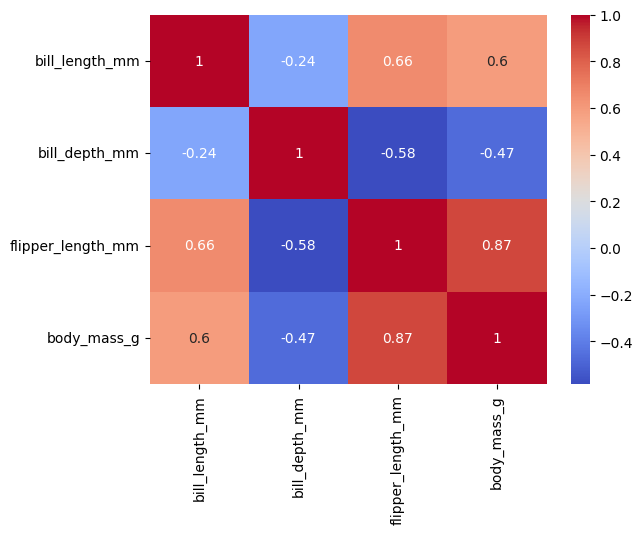

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()